### References
- https://estevestoni.medium.com/agrupando-conceitos-e-classificando-imagens-com-deep-learning-5b2674f99539


In [1]:
import cv2
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

2022-02-03 22:47:11.784301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/murilo/Code/pyProjects/cat_dog_classification/lib/python3.8/site-packages/cv2/../../lib64:/opt/ThirdParty-8/platforms/linux64Gcc/gperftools-svn/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib/paraview-5.6:/opt/paraviewopenfoam56/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib/openmpi-system:/opt/ThirdParty-8/platforms/linux64GccDPInt32/lib/openmpi-system:/usr/lib/x86_64-linux-gnu/openmpi/lib:/home/murilo/OpenFOAM/murilo-8/platforms/linux64GccDPInt32Opt/lib:/opt/site/8/platforms/linux64GccDPInt32Opt/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib:/opt/ThirdParty-8/platforms/linux64GccDPInt32/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib/dummy
2022-02-03 22:47:11.784340: I tensorflow/stream_executor/cuda/cudart_s

In [2]:
df = pd.read_csv('./data/dataframe.csv', index_col='Unnamed: 0')
df

,filename,filepath,breed,extension,cat_or_dog
0,Abyssinian_100.jpg,./data/images/Abyssinian_100.jpg,Abyssinian,.jpg,cat
2,Abyssinian_101.jpg,./data/images/Abyssinian_101.jpg,Abyssinian,.jpg,cat
4,Abyssinian_102.jpg,./data/images/Abyssinian_102.jpg,Abyssinian,.jpg,cat
6,Abyssinian_103.jpg,./data/images/Abyssinian_103.jpg,Abyssinian,.jpg,cat
7,Abyssinian_104.jpg,./data/images/Abyssinian_104.jpg,Abyssinian,.jpg,cat
...,...,...,...,...,...
7388,yorkshire_terrier_96.jpg,./data/images/yorkshire_terrier_96.jpg,yorkshire_terrier,.jpg,dog
7389,yorkshire_terrier_97.jpg,./data/images/yorkshire_terrier_97.jpg,yorkshire_terrier,.jpg,dog
7390,yorkshire_terrier_98.jpg,./data/images/yorkshire_terrier_98.jpg,yorkshire_terrier,.jpg,dog
7391,yorkshire_terrier_99.jpg,./data/images/yorkshire_terrier_99.jpg,yorkshire_terrier,.jpg,dog


In [3]:
import os
path = './data/pets/'
try:
    os.makedirs(name=path + 'cat')
    os.makedirs(name=path + 'dog')
    for index, data in df.iterrows():
        os.rename(data['filepath'], path+data['cat_or_dog']+'/'+data['filename'])
except FileExistsError:
    pass


In [14]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['cat_or_dog'], axis=1),
#                                                     df['cat_or_dog'],
#                                                     train_size=0.8, 
#                                                     random_state=42)
# df = X_train.join(y_train)

In [12]:
image_gen.flow_from_directory('./data/pets')

Found 7390 images belonging to 2 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

input_shape = (32, 32, 3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

2022-02-03 22:47:18.901089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/murilo/Code/pyProjects/cat_dog_classification/lib/python3.8/site-packages/cv2/../../lib64:/opt/ThirdParty-8/platforms/linux64Gcc/gperftools-svn/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib/paraview-5.6:/opt/paraviewopenfoam56/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib/openmpi-system:/opt/ThirdParty-8/platforms/linux64GccDPInt32/lib/openmpi-system:/usr/lib/x86_64-linux-gnu/openmpi/lib:/home/murilo/OpenFOAM/murilo-8/platforms/linux64GccDPInt32Opt/lib:/opt/site/8/platforms/linux64GccDPInt32Opt/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib:/opt/ThirdParty-8/platforms/linux64GccDPInt32/lib:/opt/openfoam8/platforms/linux64GccDPInt32Opt/lib/dummy
2022-02-03 22:47:18.901139: W tensorflow/stream_executor/cuda/cuda_driver.cc:269

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [10]:
batch_size = 25
train_image_gen = image_gen.flow_from_directory('./data/pets', 
                                                subset='training',
                                                target_size=input_shape[:2],
                                                batch_size = batch_size, 
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory('./data/pets', 
                                               subset='validation',
                                               target_size=input_shape[:2],
                                               batch_size = batch_size, 
                                               class_mode='binary')

Found 5912 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


In [11]:
# results = model.fit(train_image_gen, epochs=50, steps_per_epoch=100, validation_data=test_image_gen, validation_steps=15)

Epoch 1/50
100/100 [==============================] - 11s 108ms/step - loss: 0.6169 - accuracy: 0.6892 - val_loss: 0.6352 - val_accuracy: 0.6533
Epoch 2/50
100/100 [==============================] - 11s 106ms/step - loss: 0.6102 - accuracy: 0.6704 - val_loss: 0.5938 - val_accuracy: 0.6827
Epoch 3/50
100/100 [==============================] - 10s 104ms/step - loss: 0.5969 - accuracy: 0.6820 - val_loss: 0.5891 - val_accuracy: 0.6987
Epoch 4/50
100/100 [==============================] - 11s 107ms/step - loss: 0.5912 - accuracy: 0.6944 - val_loss: 0.5618 - val_accuracy: 0.7120
Epoch 5/50
100/100 [==============================] - 10s 103ms/step - loss: 0.5770 - accuracy: 0.6856 - val_loss: 0.5821 - val_accuracy: 0.7040
Epoch 6/50
100/100 [==============================] - 10s 103ms/step - loss: 0.5666 - accuracy: 0.7041 - val_loss: 0.6163 - val_accuracy: 0.7093
Epoch 7/50
100/100 [==============================] - 10s 103ms/step - loss: 0.5698 - accuracy: 0.7000 - val_loss: 0.6147 - val_ac

In [12]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['loss']
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

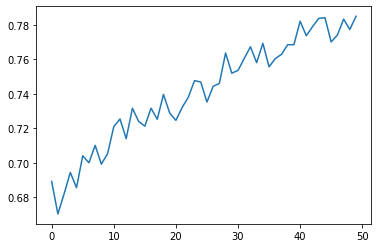

In [17]:
plt.plot(results.epoch, accuracy)
# plt.plot(results.epoch, val_accuracy)
# plt.plot(results.epoch, loss)
# plt.plot(results.epoch, val_loss)

In [77]:
# import numpy as np
# from keras.preprocessing import image
# dog_file = './cachorro.jpg'
# dog_img = image.load_img(dog_file, target_size=(32, 32))
# dog_img = image.img_to_array(dog_img)
# dog_img = np.expand_dims(dog_img, axis=0)
# dog_img = dog_img/255
# prediction_prob = model.predict(dog_img)
# prediction_prob

array([[0.94304943]], dtype=float32)